In [129]:
import sympy as sp
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


In [130]:
def soma_rm(rm):
    return sum(int(i) for i in str(rm))
rm = int(input("Insira seu rm: "))
#z = calcular a soma dos digitos do rm e multiplicar por 3000
z = soma_rm(rm)*3000
print(f'O rm escolhido é {rm} e a soma dos digitos multiplicada por 3000 é {z}')

O rm escolhido é 558261 e a soma dos digitos multiplicada por 3000 é 81000


In [131]:
# V = variável da função
V = sp.Symbol('V')
# N = função do para estimar o Número N diário de unidades vendidas em função do preço V de venda em centenas de reais (R$) de cada unidade vendida:
N = -9*V**4 + 240*V**3 - 1728*V**2 + z
print('Função N(V): ')
-9*V**4 + 240*V**3 - 1728*V**2 + z

Função N(V): 


-9*V**4 + 240*V**3 - 1728*V**2 + 81000

In [132]:
# Calcular a derivada de N em relação a V
N_primeira_derivada = sp.diff(N, V)
print(f'Derivada de N em relação a V: ')
N_primeira_derivada

Derivada de N em relação a V: 


-36*V**3 + 720*V**2 - 3456*V

In [133]:
# Resolver N'(V) = 0 para encontrar os pontos críticos
pontos_criticos = sp.solve(N_primeira_derivada, V)
print(f'Pontos críticos são: {pontos_criticos}')


Pontos críticos são: [0, 8, 12]


In [134]:

# Calcular a segunda derivada para determinar se é máximo ou mínimo
N_segunda_derivada = sp.diff(N_primeira_derivada, V)
print('A segunda derivada de N em relação a V é: ')
N_segunda_derivada

A segunda derivada de N em relação a V é: 


-108*V**2 + 1440*V - 3456

In [135]:
# Verificar os pontos críticos e o valor da função N nesses pontos
for ponto in pontos_criticos:
    if ponto >= 0 and ponto <= max(pontos_criticos):
        N_valor = N.subs(V, ponto)
        concavidade = N_segunda_derivada.subs(V, ponto)
    
        if concavidade > 0:
            natureza = 'mínimo'
        elif concavidade < 0:
            natureza = 'máximo'
        else:
            natureza = 'indefinido (possível ponto de inflexão)'
        print(f'Para V = {ponto}, N = {N_valor} é um ponto de {natureza}')    


Para V = 0, N = 81000 é um ponto de máximo
Para V = 8, N = 56424 é um ponto de mínimo
Para V = 12, N = 60264 é um ponto de máximo


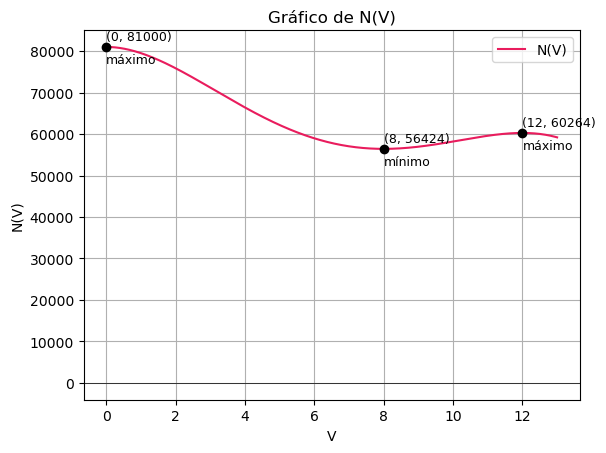

In [136]:
# Converter a derivada para uma função lambda que pode ser usada com NumPy
N_lambda = sp.lambdify(V, N, 'numpy')

# Criar um intervalo de valores de V para plotar o gráfico
V_intervalo_valores = np.linspace(0, 13, 1000)

# Calcular os valores da derivada para esses pontos
N_valores = N_lambda(V_intervalo_valores)

# Plotar o gráfico da primeira derivada
plt.plot(V_intervalo_valores, N_valores, label="N(V)", color='#e91c5d')
plt.axhline(0, color='black',linewidth=0.5)  # linha y = 0 para referência
plt.title("Gráfico de N(V)")
plt.xlabel('V')
plt.ylabel("N(V)")
plt.grid(True)

# Imprimir os pontos criticos no gráfico com as coordenadas e classificação
for ponto in pontos_criticos:
    if ponto >= 0 and ponto <= max(pontos_criticos):
        N_valor = N.subs(V, ponto)
        plt.plot(ponto, N_valor, 'o', color='black')	
        plt.text(ponto, N_valor+1500, f'({ponto}, {N_valor})', fontsize=9)
        concavidade = N_segunda_derivada.subs(V, ponto)
    
        if concavidade > 0:
            natureza = 'mínimo'
        elif concavidade < 0:
            natureza = 'máximo'
        else:
            natureza = 'indefinido (possível ponto de inflexão)'
        plt.text(ponto, N_valor-4000, f'{natureza}', fontsize=9)

plt.legend()
plt.show()

In [137]:
# Filtrar os pontos críticos que estão no intervalo 0 < V <= 13
pontos_criticos_validos = [p for p in pontos_criticos if 0 <= p <= 13]
pontos_criticos_validos = sorted(pontos_criticos_validos)

# Adicionar os limites do intervalo [0, 13]
pontos_criticos_validos = [0] + pontos_criticos_validos + [13]

# Verificar o sinal da derivada nos intervalos definidos pelos pontos críticos
intervalos = []
for i in range(len(pontos_criticos_validos) - 1):
    start = pontos_criticos_validos[i]
    end = pontos_criticos_validos[i + 1]
    mid_point = (start + end) / 2
    
    # Avaliar o sinal da derivada no ponto médio do intervalo
    derivative_at_mid = N_primeira_derivada.subs(V, mid_point)
    
    if derivative_at_mid > 0:
        intervalos.append((start, end, "tem seu crescimento"))
    elif derivative_at_mid < 0:
        intervalos.append((start, end, "tem seu decrescimento"))

# Imprimir os intervalos de crescimento e decrescimento
for intervalo in intervalos:
    print(f"A função {intervalo[2]} no intervalo ({intervalo[0]}, {intervalo[1]})")

A função tem seu decrescimento no intervalo (0, 8)
A função tem seu crescimento no intervalo (8, 12)
A função tem seu decrescimento no intervalo (12, 13)


In [138]:
print(f'''
      Integrantes do Grupo:
      Nome                       | RM
      Ana Luiza Oliveira Dourado | 558793
      Lucas Rodrigues Grecco     | 558261
      Monique Ferreira dos Anjos | 558262
      Felipe Wapf Fettback       | 557217
      Ronaldo Veloso Filho       | 556445
      
      O rm utilizado foi {rm}      
      ''')
print('Respostas: \n')
print('1- As coordenadas dos pontos críticos são:')
for ponto in pontos_criticos:
    if ponto >= 0 and ponto <= max(pontos_criticos):
        N_valor = N.subs(V, ponto)
        concavidade = N_segunda_derivada.subs(V, ponto)
    
        if concavidade > 0:
            natureza = 'mínimo'
        elif concavidade < 0:
            natureza = 'máximo'
        else:
            natureza = 'indefinido (possível ponto de inflexão)'
        print(f'- ({ponto},{N_valor})')
        
print('\n2- Classificação dos pontos críticos:')
for ponto in pontos_criticos:
    if ponto >= 0 and ponto <= max(pontos_criticos):
        N_valor = N.subs(V, ponto)
        concavidade = N_segunda_derivada.subs(V, ponto)
    
        if concavidade > 0:
            natureza = 'mínimo'
        elif concavidade < 0:
            natureza = 'máximo'
        else:
            natureza = 'indefinido (possível ponto de inflexão)'
        print(f'Para V = {ponto}, N = {N_valor} é um ponto de {natureza}') 
print('\n3- Determinar os intervalos de crescimento e decrescimento da função N(V):')
# Filtrar os pontos críticos que estão no intervalo 0 < V <= 13
pontos_criticos_validos = [p for p in pontos_criticos if 0 <= p <= 13]
pontos_criticos_validos = sorted(pontos_criticos_validos)

# Adicionar os limites do intervalo [0, 13]
pontos_criticos_validos = [0] + pontos_criticos_validos + [13]

# Verificar o sinal da derivada nos intervalos definidos pelos pontos críticos
intervalos = []
for i in range(len(pontos_criticos_validos) - 1):
    start = pontos_criticos_validos[i]
    end = pontos_criticos_validos[i + 1]
    mid_point = (start + end) / 2
    
    # Avaliar o sinal da derivada no ponto médio do intervalo
    derivative_at_mid = N_primeira_derivada.subs(V, mid_point)
    
    if derivative_at_mid > 0:
        intervalos.append((start, end, "tem seu crescimento"))
    elif derivative_at_mid < 0:
        intervalos.append((start, end, "tem seu decrescimento"))

# Imprimir os intervalos de crescimento e decrescimento
for intervalo in intervalos:
    print(f"A função {intervalo[2]} no intervalo ({intervalo[0]}, {intervalo[1]})")

print('\n4- Contextualizar os intervalos obtidos:')
for ponto in pontos_criticos:
    if ponto >= 0 and ponto <= max(pontos_criticos):
        N_valor = N.subs(V, ponto)
        concavidade = N_segunda_derivada.subs(V, ponto)
    
        if concavidade > 0:
            natureza = 'mínimo'
        elif concavidade < 0:
            natureza = 'máximo'
        else:
            natureza = 'indefinido (possível ponto de inflexão)'
        print(f'Para o Preço: R${ponto*100}, se tem a venda diária de {N_valor} unidades ') 
print('\n')
# Filtrar os pontos críticos que estão no intervalo 0 < V <= 13
pontos_criticos_validos = [p for p in pontos_criticos if 0 <= p <= 13]
pontos_criticos_validos = sorted(pontos_criticos_validos)

# Adicionar os limites do intervalo [0, 13]
pontos_criticos_validos = [0] + pontos_criticos_validos + [13]

# Verificar o sinal da derivada nos intervalos definidos pelos pontos críticos
intervalos = []
for i in range(len(pontos_criticos_validos) - 1):
    start = pontos_criticos_validos[i]
    end = pontos_criticos_validos[i + 1]
    mid_point = (start + end) / 2
    
    # Avaliar o sinal da derivada no ponto médio do intervalo
    derivative_at_mid = N_primeira_derivada.subs(V, mid_point)
    
    if derivative_at_mid > 0:
        intervalos.append((start, end, "tem seu crescimento"))
    elif derivative_at_mid < 0:
        intervalos.append((start, end, "tem seu decrescimento"))

# Imprimir os intervalos de crescimento e decrescimento
for intervalo in intervalos:
    print(f"A função {intervalo[2]} no intervalo do preço de venda em reais de R${intervalo[0]} até R${intervalo[1]*100}")



      Integrantes do Grupo:
      Nome                       | RM
      Ana Luiza Oliveira Dourado | 558793
      Lucas Rodrigues Grecco     | 558261
      Monique Ferreira dos Anjos | 558262
      Felipe Wapf Fettback       | 557217
      Ronaldo Veloso Filho       | 556445
      
      O rm utilizado foi 558261      
      
Respostas: 

1- As coordenadas dos pontos críticos são:
- (0,81000)
- (8,56424)
- (12,60264)

2- Classificação dos pontos críticos:
Para V = 0, N = 81000 é um ponto de máximo
Para V = 8, N = 56424 é um ponto de mínimo
Para V = 12, N = 60264 é um ponto de máximo

3- Determinar os intervalos de crescimento e decrescimento da função N(V):
A função tem seu decrescimento no intervalo (0, 8)
A função tem seu crescimento no intervalo (8, 12)
A função tem seu decrescimento no intervalo (12, 13)

4- Contextualizar os intervalos obtidos:
Para o Preço: R$0, se tem a venda diária de 81000 unidades 
Para o Preço: R$800, se tem a venda diária de 56424 unidades 
Para o Preço: R